In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
data=pd.read_csv('Project Plan detailed.csv')

In [3]:
data.dtypes

Phase         object
Sub-Phase     object
Start Date    object
End Date      object
dtype: object

In [4]:
data['Start Date']=pd.to_datetime(data['Start Date'],format='%d/%m/%Y')
data['End Date']=pd.to_datetime(data['End Date'],format='%d/%m/%Y')
data['Date Difference in days']=(data['End Date']-data['Start Date']).dt.days

In [5]:
data['Phase']=data['Phase'].str.wrap(20)

In [6]:
data

,Phase,Sub-Phase,Start Date,End Date,Date Difference in days
0,Preparatory Phase,Literature Review of similar robot modelling a...,2019-07-15,2019-07-21,6
1,Preparatory Phase,Familiarising with the work undertaken so far ...,2019-07-21,2019-07-24,3
2,Simulation and\nModelling,Building the generic model,2019-07-19,2019-07-25,6
3,Simulation and\nModelling,Implementing the neural network model,2019-07-25,2019-08-10,16
4,Simulation and\nModelling,Revising the models to incoporate control stra...,2019-08-10,2019-08-19,9
5,Analysis and\nCompilation of\nResults,Analysing performance and failure modes,2019-08-08,2019-08-22,14
6,Analysis and\nCompilation of\nResults,Compiling of results,2019-08-22,2019-08-28,6
7,Report Writing,Report Writing,2019-08-26,2019-09-02,7


In [7]:
data['y']=[3,3,2,2,2,1,1,0]

In [8]:
cm1=plt.get_cmap('tab20c')
cm2=plt.get_cmap('Set1')
clist=[cm1(1),cm1(0),cm1(6),cm1(5),cm1(4),cm1(9),cm1(8),cm2(0)]

In [9]:
data['Start Date_mdate'] = [mdates.date2num(d) for d in data['Start Date']]
data['End Date_mdate'] = [mdates.date2num(d) for d in data['End Date']]

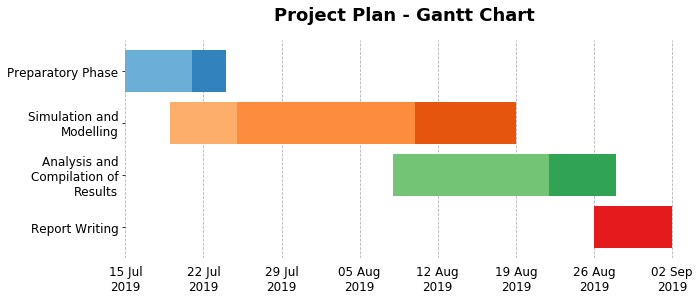

In [10]:
fig, ax = plt.subplots(figsize=(10,4))
mpl.rcParams['axes.titlepad'] = 20 
ax.set_xlim(737255.0,737305.0)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %b\n%Y'))
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
ax.set_axisbelow(True)
ax.xaxis.grid(linestyle='dashed')
ax.set_yticks(np.arange(4))
ax.set_yticklabels(data['Phase'].unique()[::-1],fontsize=12)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
#ax.set_yticklabels(data['Phase'].unique()[::-1],fontproperties=label_prop)

plt.barh(data['y'],data['End Date_mdate']-data['Start Date_mdate'],left=data['Start Date_mdate'],color=clist)

for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.tick_params(top=False, bottom=False, left=True, right=False, labelleft=True, labelbottom=True)
plt.title('Project Plan - Gantt Chart',fontsize=18,fontweight='semibold')
#plt.title('Project Plan - Gantt Chart',fontproperties=title_prop)
#plt.savefig('Gantt Chart - Version 2.png')
plt.show()